In [ ]:
# Libraries

library(splines)
library(mgcv)

# Data preperation
data <- read.csv("/content/tritium.csv")
n <- length(as.vector(t(data["pressure"])))
n

train <- data[1:550, c("pressure", "tritium")]
test <- data[551:n, c("pressure", "tritium")]
pressure = NULL
tritium = NULL

[1] 802

# Splines


Call:
lm(formula = tritium ~ bs(pressure, df = 5, degree = 3), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8253 -0.3597 -0.0213  0.4103  3.3243 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         4.9183     0.1387  35.468  < 2e-16 ***
bs(pressure, df = 5, degree = 3)1   1.4446     0.2811   5.139 3.85e-07 ***
bs(pressure, df = 5, degree = 3)2  -3.8299     0.1571 -24.386  < 2e-16 ***
bs(pressure, df = 5, degree = 3)3  -4.8700     0.3430 -14.200  < 2e-16 ***
bs(pressure, df = 5, degree = 3)4  -4.9992     0.4943 -10.114  < 2e-16 ***
bs(pressure, df = 5, degree = 3)5  -4.5312     0.4601  -9.849  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7334 on 544 degrees of freedom
Multiple R-squared:  0.8381,	Adjusted R-squared:  0.8366 
F-statistic: 563.1 on 5 and 544 DF,  p-value: < 2.2e-16


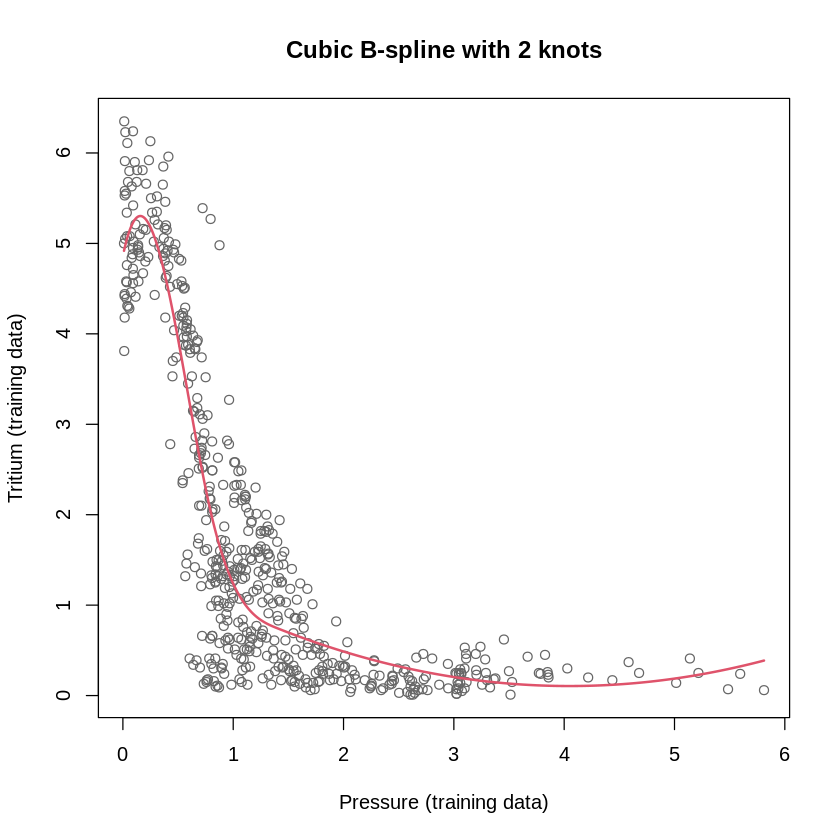

In [ ]:
# degree = order(r) -1
# df = degree + knots

# Two knots
b_est <- lm(tritium ~ bs(pressure, df=5, degree=3), data = train)
summary(b_est)
xval <- seq(min(train["pressure"]),max(train["pressure"]),length.out = 550)
yhat <- predict(b_est, newdata = data.frame(pressure = xval))
plot(train$pressure, train$tritium, col="gray40", xlab = "Pressure (training data)", ylab = "Tritium (training data)", main = "Cubic B-spline with 2 knots")
points(xval, yhat, type = "l", col=2, lwd=2)

[1] 8

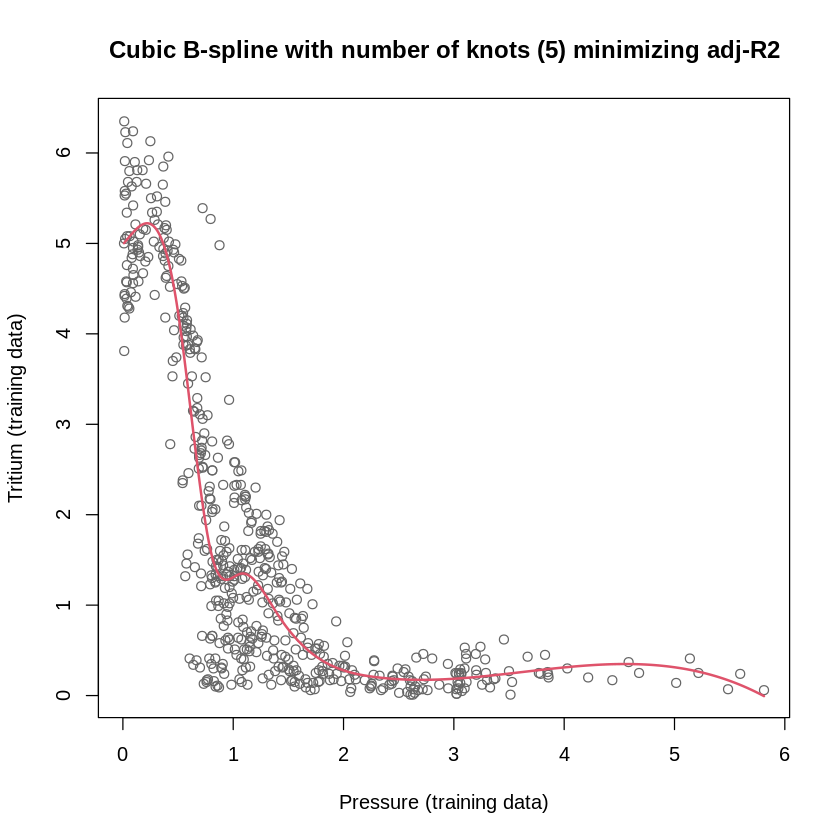

In [ ]:
#Finding the number of knots that gives the highest adjusted-r-squared

num = 0
rr = 0
for (i in c(3:20)){
  b_est2 <- lm(tritium ~ bs(pressure, df=i, degree=3), data = train)
  if (summary(b_est2)$adj > rr){
    rr = summary(b_est2)$adj
    num = i
  }
}

num
#df = 8 => 5 knots optimal

b_est2 <- NULL
b_est2 <- lm(tritium ~ bs(pressure, df=8, degree=3), data = train)

yhat2 <- predict(b_est2, newdata = data.frame(pressure=xval))
plot(train$pressure, train$tritium, col="gray40", xlab = "Pressure (training data)", ylab = "Tritium (training data)", main = "Cubic B-spline with number of knots (5) minimizing adj-R2")
points(xval, yhat2, type = "l", col=2, lwd=2)

In [ ]:
#Error calculation

MSE_fun <- function(y, y_hat){
  sum((y-y_hat)^2)/length(y)
}
MAE_fun <- function(y, y_hat){
  sum(abs(y-y_hat))/length(y)
}


pred1 <- predict(b_est, newdata = test)
pred2 <- predict(b_est2, newdata = test)

MSE_fun(test$tritium, pred1)
MAE_fun(test$tritium, pred1)

MSE_fun(test$tritium, pred2)
MAE_fun(test$tritium, pred2)

#The second function with 5 knots has less error when predicting for the test values

Warning message in bs(pressure, degree = 3L, knots = c(0.80222222, 1.408521662), :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”
Warning message in bs(pressure, degree = 3L, knots = c(0.4800265315, 0.80222222, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”


[1] 0.3638559

[1] 0.4828815

[1] 0.3473401

[1] 0.4626663

# multivariate non-parametric regression

s(longitude,latitude) 
             56.35915 


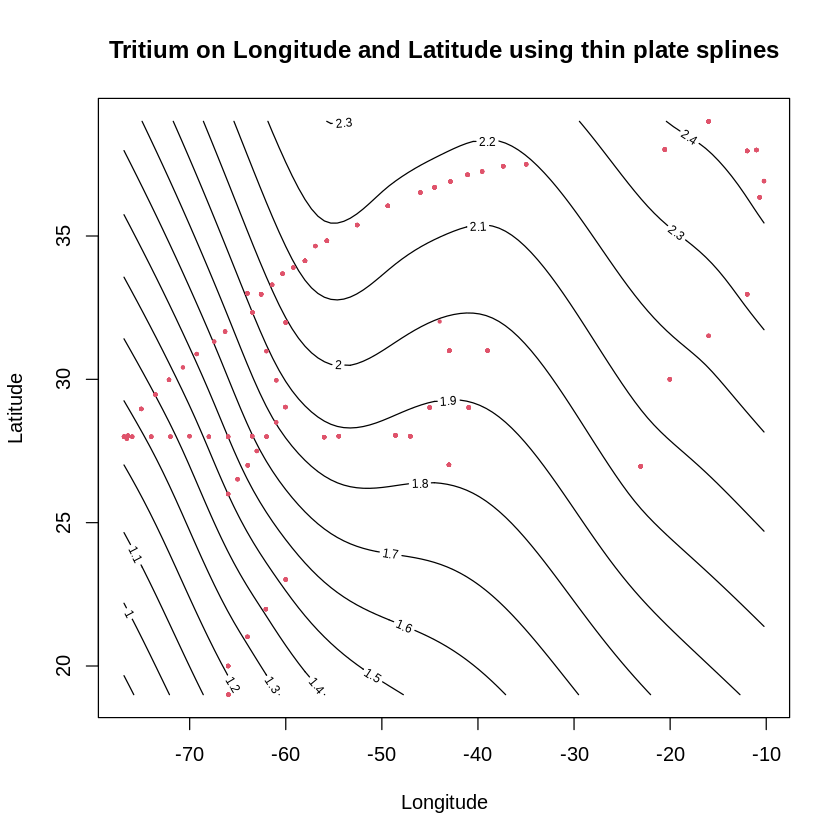

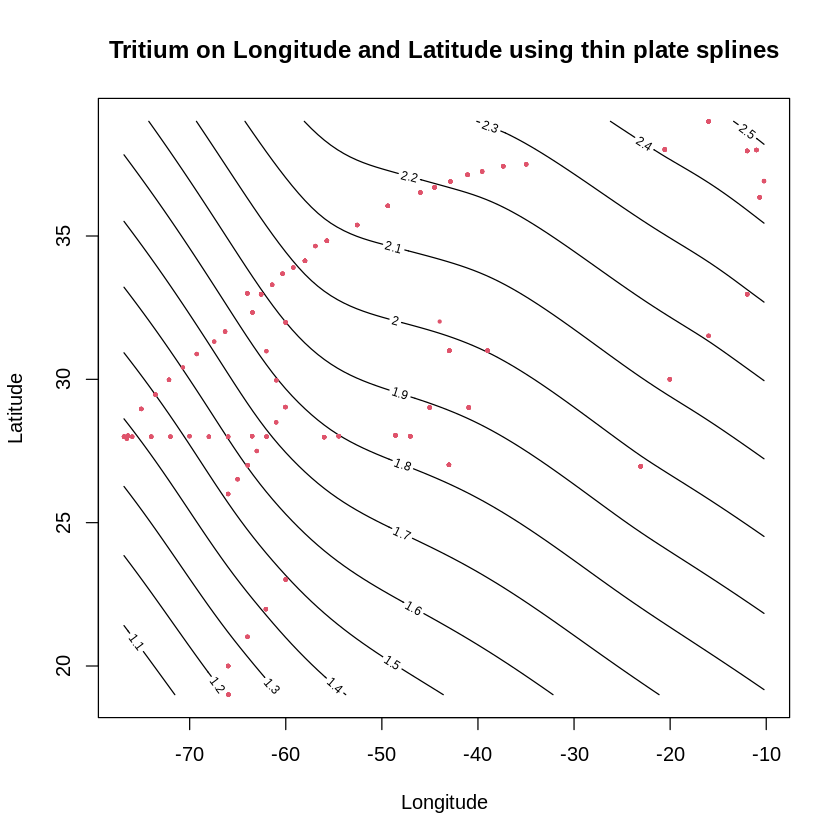

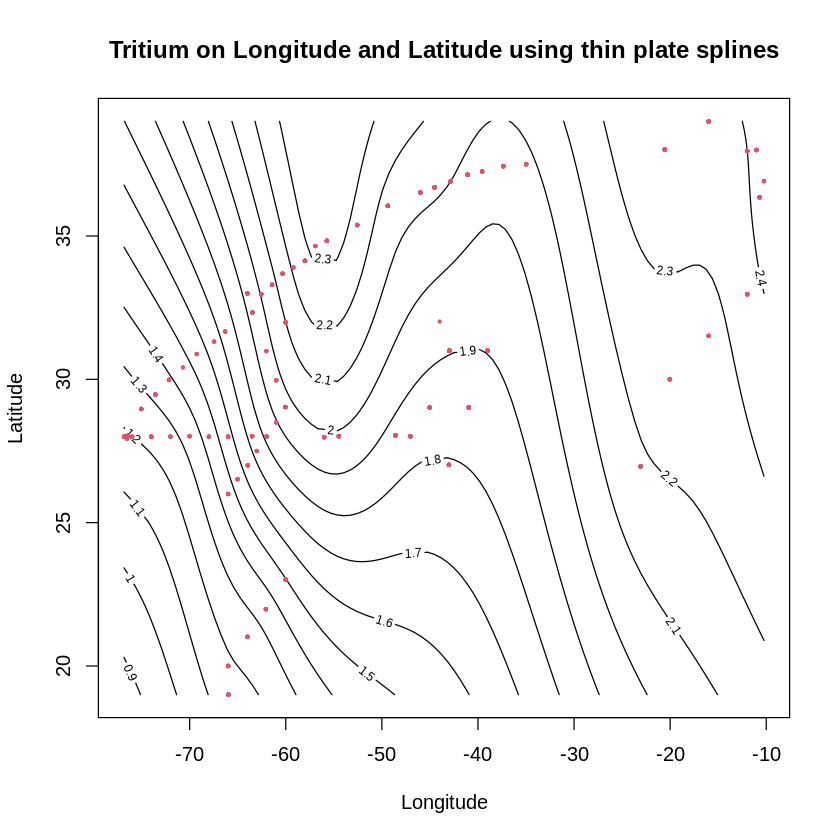

In [ ]:
#define all variables for this section
longitude <- as.vector(t(data["longitude"]))
latitude <- as.vector(t(data["latitude"]))
salinity <- as.vector(t(data["salinity"]))
pressure <- as.vector(t(data["pressure"]))
tritium <- as.vector(t(data["tritium"]))

#bivariate reg, penalty = thinplate
est_biv <- gam(tritium ~ s(longitude, latitude, bs = "tp"))
print(est_biv$sp)

#plot
x1val <- seq(min(longitude),max(longitude), length.out = 100)
x2val <- seq(min(latitude),max(latitude), length.out = 100)
x12val <- expand.grid(longitude=x1val,latitude=x2val)
yhat <- predict(est_biv, newdata = x12val)
ymat <- matrix(yhat, 100, 100)
contour(x = x1val, y = x2val, z = ymat, xlab ="Longitude", ylab = "Latitude", xlim=c(min(longitude),max(longitude)), ylim=c(min(latitude),max(latitude)),nlevels=15, main = "Tritium on Longitude and Latitude using thin plate splines")
points(longitude,latitude,col=2,pch=20,cex=0.5)



#what happens when complexity is more or less penalized than cross validated lambda gives?
#bivariate reg, penalty = thinplate, sp=250
est_biv1 <- gam(tritium ~ s(longitude, latitude, bs = "tp", sp=250))

#plot
yhat1 <- predict(est_biv1, newdata = x12val)
ymat1 <- matrix(yhat1, 100, 100)
contour(x = x1val, y = x2val, z = ymat1, xlab ="Longitude", ylab = "Latitude", xlim=c(min(longitude),max(longitude)), ylim=c(min(latitude),max(latitude)),nlevels=15, main = "Tritium on Longitude and Latitude using thin plate splines")
points(longitude,latitude,col=2,pch=20,cex=0.5)

#bivariate reg, penalty = thinplate, sp=10
est_biv2 <- gam(tritium ~ s(longitude, latitude, bs = "tp", sp=10))

#plot
yhat2 <- predict(est_biv2, newdata = x12val)
ymat2 <- matrix(yhat2, 100, 100)
contour(x = x1val, y = x2val, z = ymat2, xlab ="Longitude", ylab = "Latitude", xlim=c(min(longitude),max(longitude)), ylim=c(min(latitude),max(latitude)),nlevels=15, main = "Tritium on Longitude and Latitude using thin plate splines")
points(longitude,latitude,col=2,pch=20,cex=0.5)


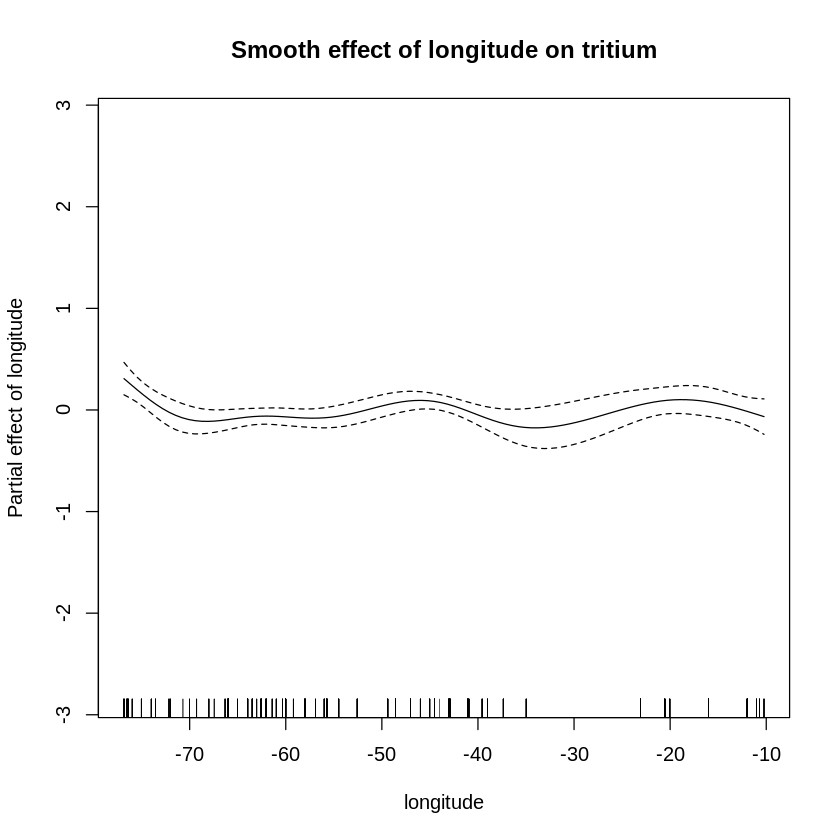

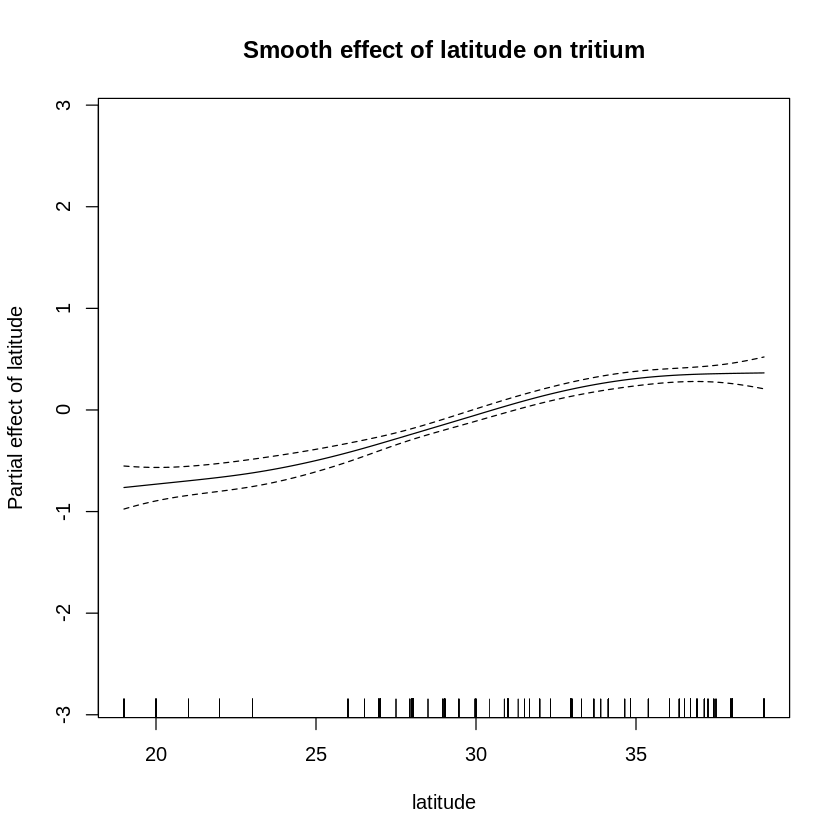

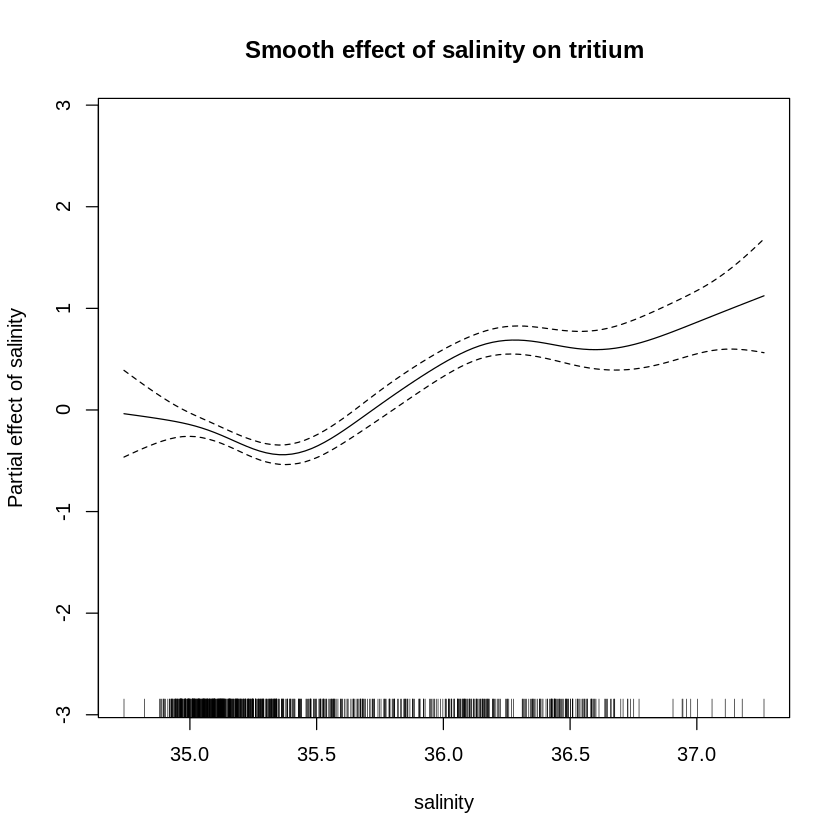


Family: gaussian 
Link function: identity 

Formula:
tritium ~ s(longitude) + s(latitude) + s(salinity) + s(pressure)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.91020    0.01763   108.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df       F  p-value    
s(longitude) 7.416  8.321   3.244 0.000971 ***
s(latitude)  3.581  4.376  45.649  < 2e-16 ***
s(salinity)  6.362  7.554  24.729  < 2e-16 ***
s(pressure)  8.926  8.997 165.908  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.93   Deviance explained = 93.2%
GCV = 0.25812  Scale est. = 0.24933   n = 802


Call:
lm(formula = tritium ~ longitude)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4522 -1.4800 -0.6739  1.6910  4.5610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.654387   0.180012   14.75  < 2e-16 ***
longitude   0.015204   0.003424    4.44 1.02e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.86 on 800 degrees of freedom
Multiple R-squared:  0.02405,	Adjusted R-squared:  0.02283 
F-statistic: 19.72 on 1 and 800 DF,  p-value: 1.025e-05



Call:
lm(formula = tritium ~ latitude)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3808 -1.4106 -0.8073  1.6749  4.4523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03767    0.42579  -0.088     0.93    
latitude     0.06227    0.01345   4.630 4.27e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.858 on 800 degrees of freedom
Multiple R-squared:  0.0261,	Adjusted R-squared:  0.02488 
F-statistic: 21.44 on 1 and 800 DF,  p-value: 4.265e-06



Call:
lm(formula = tritium ~ salinity)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8261 -0.5015 -0.0792  0.4575  4.1471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -103.00382    2.15559  -47.78   <2e-16 ***
salinity       2.95237    0.06065   48.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.946 on 800 degrees of freedom
Multiple R-squared:  0.7476,	Adjusted R-squared:  0.7473 
F-statistic:  2369 on 1 and 800 DF,  p-value: < 2.2e-16



Call:
lm(formula = tritium ~ pressure)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4653 -1.1261 -0.2173  1.0990  4.1616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.56191    0.07698   46.27   <2e-16 ***
pressure    -1.31873    0.04819  -27.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.353 on 800 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4828 
F-statistic: 748.8 on 1 and 800 DF,  p-value: < 2.2e-16


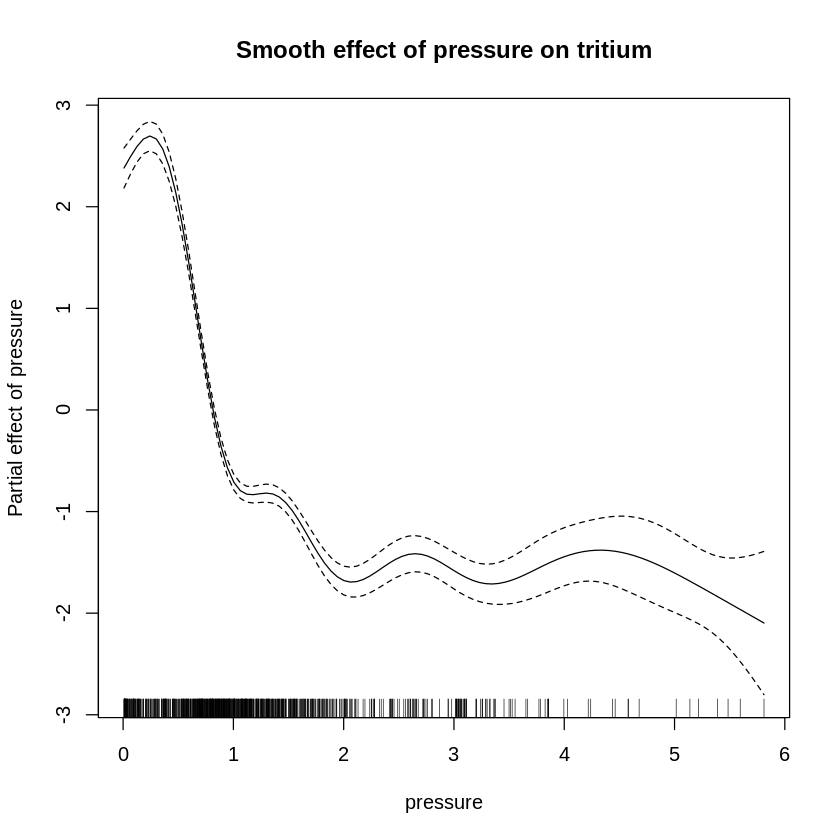

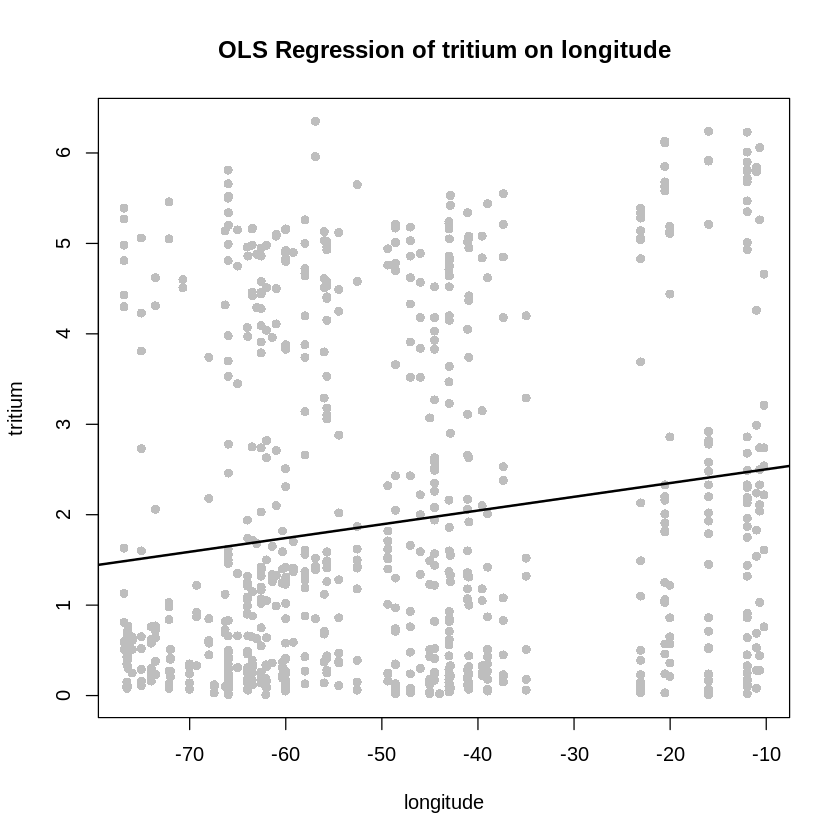

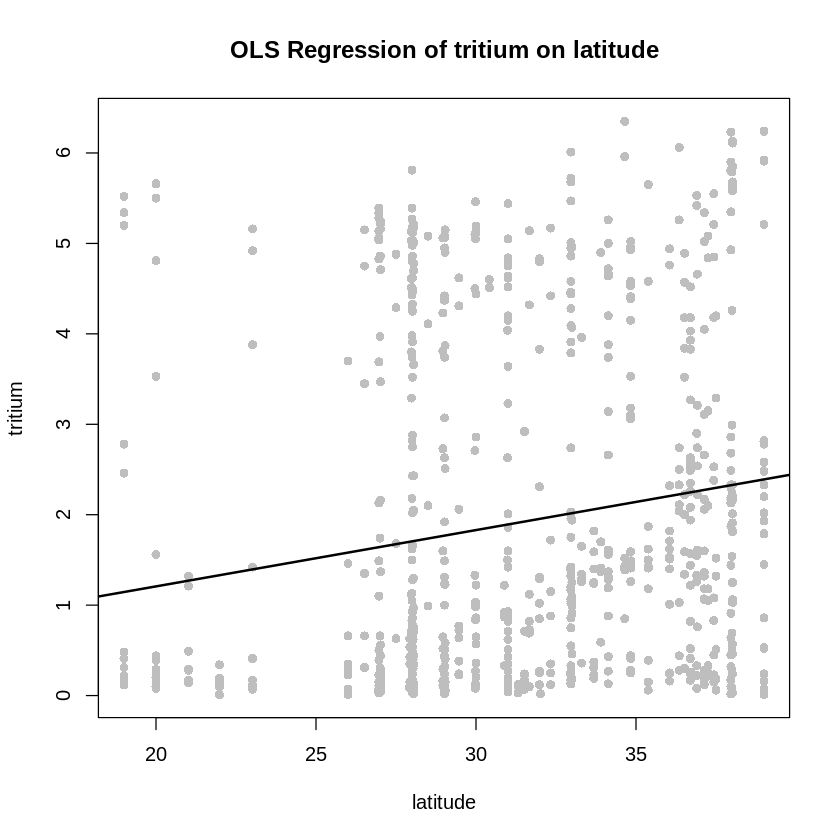

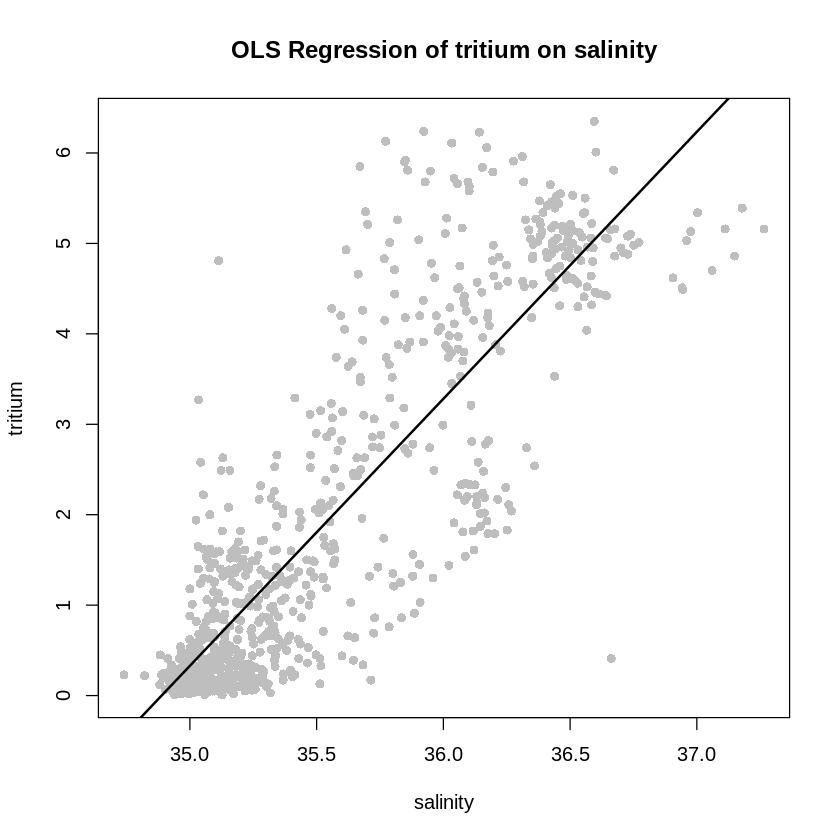

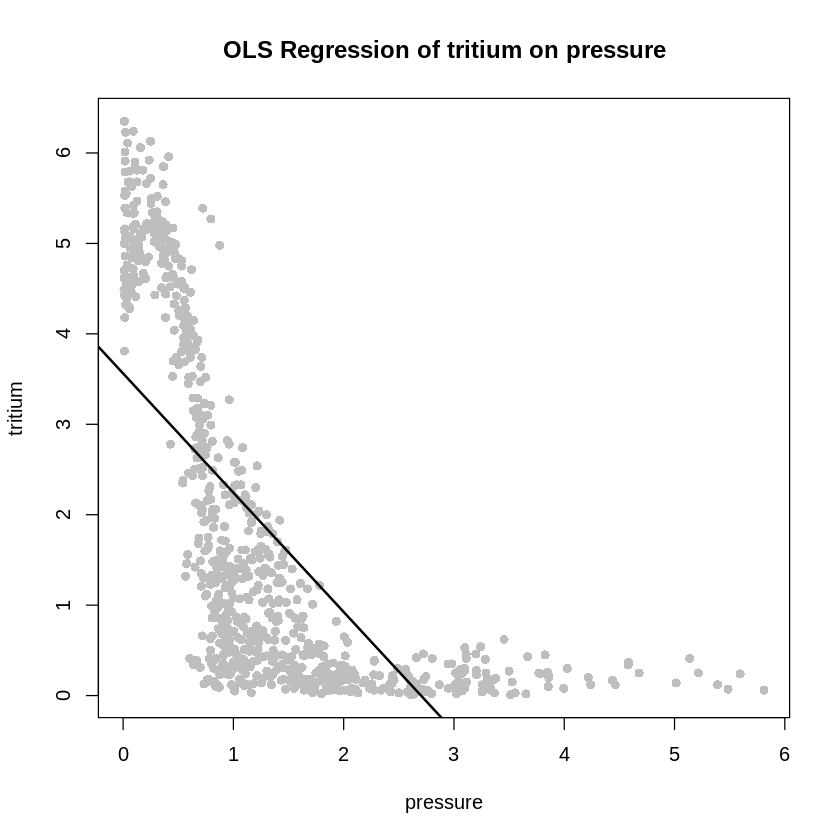

In [ ]:
est_all <- gam(tritium ~ s(longitude) + s(latitude) + s(salinity) + s(pressure))

# Plot only the smooth for longitude
plot(est_all, select = 1, ylab = "Partial effect of longitude", main = "Smooth effect of longitude on tritium")

# Plot only the smooth for latitude
plot(est_all, select = 2, ylab = "Partial effect of latitude", main = "Smooth effect of latitude on tritium")

# Plot only the smooth for salinity
plot(est_all, select = 3, ylab = "Partial effect of salinity", main = "Smooth effect of salinity on tritium")

# Plot only the smooth for pressure
plot(est_all, select = 4, ylab = "Partial effect of pressure", main = "Smooth effect of pressure on tritium")

summary(est_all)

#Compare with OLS plots
ols_long <- lm(tritium ~ longitude)
ols_lat <- lm(tritium ~ latitude)
ols_sal <- lm(tritium ~ salinity)
ols_pre <- lm(tritium ~ pressure)

summary(ols_long)
summary(ols_lat)
summary(ols_sal)
summary(ols_pre)

plot(longitude, tritium, pch = 16, col = "gray", main = "OLS Regression of tritium on longitude", xlab = "longitude", ylab = "tritium")
abline(ols_long, col = "black", lwd = 2)

plot(latitude, tritium, pch = 16, col = "gray", main = "OLS Regression of tritium on latitude", xlab = "latitude", ylab = "tritium")
abline(ols_lat, col = "black", lwd = 2)

plot(salinity, tritium, pch = 16, col = "gray", main = "OLS Regression of tritium on salinity", xlab = "salinity", ylab = "tritium")
abline(ols_sal, col = "black", lwd = 2)

plot(pressure, tritium, pch = 16, col = "gray", main = "OLS Regression of tritium on pressure", xlab = "pressure", ylab = "tritium")
abline(ols_pre, col = "black", lwd = 2)
